### 목적 : clustering 관련 모듈 기본

In [70]:
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster, sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [71]:
jeju = pd.read_csv('credit_card.csv', encoding='cp949')
jeju

,시도,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주도,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주도,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주도,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주도,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주도,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...,...
9802,제주도,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,제주도,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,제주도,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,제주도,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [72]:
data = jeju[['시군구', '읍면동', '업종', '연령대', '성별', '날짜', '이용자수', '이용횟수', '이용액']]

In [73]:
data

,시군구,읍면동,업종,연령대,성별,날짜,이용자수,이용횟수,이용액
0,제주시,읍면,유흥,60대이상,여,201812,16,21,4474000
1,제주시,읍면,유흥,60대이상,남,201812,45,59,8459100
2,제주시,읍면,유흥,50대,여,201812,38,47,4403500
3,제주시,읍면,유흥,50대,남,201812,136,174,23659532
4,제주시,읍면,유흥,40대,여,201812,60,74,5511100
...,...,...,...,...,...,...,...,...,...
9802,서귀포시,도심,교통,40대,남,201609,1778,2059,79696179
9803,서귀포시,도심,교통,30대,여,201609,1441,1543,52066479
9804,서귀포시,도심,교통,30대,남,201609,2358,2606,87972936
9805,서귀포시,도심,교통,20대,여,201609,731,765,22788256


In [74]:
data['읍면동'].unique

<bound method Series.unique of 0       읍면
1       읍면
2       읍면
3       읍면
4       읍면
        ..
9802    도심
9803    도심
9804    도심
9805    도심
9806    도심
Name: 읍면동, Length: 9807, dtype: object>

In [75]:
# data = pd.get_dummies(data=data, columns=['시도'], prefix=['시도'])
data = pd.get_dummies(data=data, columns=['시군구'], prefix=['시군구'])
data = pd.get_dummies(data=data, columns=['읍면동'], prefix=['읍면동'])
data = pd.get_dummies(data=data, columns=['업종'], prefix=['업종'])
data = pd.get_dummies(data=data, columns=['연령대'], prefix=['연령대'])
data = pd.get_dummies(data=data, columns=['성별'], prefix=['성별'])

In [76]:
data.columns

Index(['날짜', '이용자수', '이용횟수', '이용액', '시군구_서귀포시', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_기타', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료',
       '업종_유흥', '연령대_20 미만', '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대이상', '성별_남', '성별_여'],
      dtype='object')

클러스터링 객체를 생성하고 모델을 학습시킴  
n_clusters 인자 수만큼 임의로 데이터를 군집화

In [77]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [78]:
max_score = 0
optimized_n = 0

for k in range(2, 27):
    km = KMeans(n_clusters=k, random_state=77).fit(data[columns])
    
    # silhouette_score N 개로 클러스터링했을 때 중심점을 기준으로 얼마나 잘 뭉쳐있는
    # 정도를 나타내는 수치
    s_score = silhouette_score(data[columns], km.labels_)
    
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
        
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.803
score for 3 clusters:0.727
score for 4 clusters:0.702
score for 5 clusters:0.653
score for 6 clusters:0.612
score for 7 clusters:0.608
score for 8 clusters:0.605
score for 9 clusters:0.588
score for 10 clusters:0.586
score for 11 clusters:0.581
score for 12 clusters:0.581
score for 13 clusters:0.578
score for 14 clusters:0.577
score for 15 clusters:0.578
score for 16 clusters:0.577
score for 17 clusters:0.579
score for 18 clusters:0.579
score for 19 clusters:0.577
score for 20 clusters:0.578
score for 21 clusters:0.578
score for 22 clusters:0.574
score for 23 clusters:0.575
score for 24 clusters:0.573
score for 25 clusters:0.575
score for 26 clusters:0.573

 최적의 클러스터개수: 2, silhouette 점수: 0.8033775521525415


In [79]:
columns = ['날짜', '이용자수', '이용횟수', '이용액', '시군구_서귀포시', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_기타', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료',
       '업종_유흥', '연령대_20 미만', '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대이상', '성별_남', '성별_여']
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=77)
kmeans.fit(data[columns])
data['Clusters'] = kmeans.labels_
data

,날짜,이용자수,이용횟수,이용액,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_기타,...,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여,Clusters
0,201812,16,21,4474000,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,3
1,201812,45,59,8459100,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,3
2,201812,38,47,4403500,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,3
3,201812,136,174,23659532,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,3
4,201812,60,74,5511100,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,3
9803,201609,1441,1543,52066479,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,3
9804,201609,2358,2606,87972936,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,3
9805,201609,731,765,22788256,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,3


In [51]:
data['Clusters'].unique()

array([3, 0, 1, 4, 2])

클러스터링 객체를 생성하고 모델을 학습시킴  
n_clusters 인자 수만큼 임의로 데이터를 군집화

### Label이 없는 데이터에 대한 해석

In [52]:
colums_list = ['날짜', '이용자수', '이용횟수', '이용액', '시군구_서귀포시', '시군구_제주시', '읍면동_도심', '읍면동_읍면',
       '업종_교통', '업종_기타', '업종_문화/레져', '업종_소매', '업종_쇼핑', '업종_숙박', '업종_식음료',
       '업종_유흥', '연령대_20 미만', '연령대_20대', '연령대_20대미만', '연령대_30대', '연령대_40대',
       '연령대_50대', '연령대_60대이상', '성별_남', '성별_여']
feature = data[colums_list]
feature.head()

,날짜,이용자수,이용횟수,이용액,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_기타,...,업종_유흥,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여
0,201812,16,21,4474000,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,201812,45,59,8459100,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
2,201812,38,47,4403500,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,201812,136,174,23659532,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,201812,60,74,5511100,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [54]:
import numpy as np

In [53]:
data

,날짜,이용자수,이용횟수,이용액,시군구_서귀포시,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_기타,...,연령대_20 미만,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여,Clusters
0,201812,16,21,4474000,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,3
1,201812,45,59,8459100,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,3
2,201812,38,47,4403500,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,3
3,201812,136,174,23659532,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,3
4,201812,60,74,5511100,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,201609,1778,2059,79696179,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,3
9803,201609,1441,1543,52066479,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,3
9804,201609,2358,2606,87972936,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,3
9805,201609,731,765,22788256,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,3


In [55]:
len(km.labels_)

9807

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ss = StandardScaler()
ss.fit(feature)
feature_s = ss.transform(feature)

In [64]:
km = KMeans(n_clusters=5).fit(feature_s)

### 정리

군집화 결과는 아래와 같이 사용가능하다.
* 군집화 클러스터별 마케팅 정략 수립
* 군집화된 클러스터 라벨을 지도학습의 라벨로 활용
> 라벨 없이 지도학습 가능

# LightGBM

In [65]:
data.isnull().sum()

날짜           0
이용자수         0
이용횟수         0
이용액          0
시군구_서귀포시     0
시군구_제주시      0
읍면동_도심       0
읍면동_읍면       0
업종_교통        0
업종_기타        0
업종_문화/레져     0
업종_소매        0
업종_쇼핑        0
업종_숙박        0
업종_식음료       0
업종_유흥        0
연령대_20 미만    0
연령대_20대      0
연령대_20대미만    0
연령대_30대      0
연령대_40대      0
연령대_50대      0
연령대_60대이상    0
성별_남         0
성별_여         0
Clusters     0
dtype: int64

In [69]:
data

0       3
1       3
2       3
3       3
4       3
       ..
9802    3
9803    3
9804    3
9805    3
9806    3
Name: Clusters, Length: 9807, dtype: int32

In [67]:
data = data['Clusters']
target = data['Clusters']

KeyError: 'Clusters'

In [68]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.3, random_state=100)

In [72]:
import numpy as np
from lightgbm import LGBMClassifier

In [73]:
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.996875 0.975


In [74]:
import lightgbm as lgb

In [75]:
clf = lgb.LGBMClassifier()
clf.fit(train_input, train_target)

LGBMClassifier()

In [76]:
y_pred = clf.predict(test_input)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy = accuracy_score(y_pred, test_target)

In [79]:
print(accuracy_score(test_target, y_pred))

0.9


In [80]:
print(clf.score(train_input, train_target))

1.0


In [81]:
print(clf.score(test_input, test_target))

0.9


In [82]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9875


In [83]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.00000000e+00 1.66905126e-01 2.92178184e-01 1.27883619e-01
 0.00000000e+00 0.00000000e+00 3.31984646e-05 1.64078256e-03
 3.20691440e-03 4.02923324e-03 1.16391793e-03 1.19303146e-02
 4.76190476e-04 4.76749036e-02 1.08369526e-02 1.37276044e-03
 3.04588014e-03 5.25760163e-04 1.28008193e-04 1.42890813e-03
 6.68814836e-04 1.73084801e-03 5.92874832e-04 1.95500885e-02
 3.02996720e-01]


In [140]:
train_input

,날짜,이용자수,이용횟수,이용액,시도_제주도,시군구_제주시,읍면동_도심,읍면동_읍면,업종_교통,업종_문화/레져,...,연령대_20대,연령대_20대미만,연령대_30대,연령대_40대,연령대_50대,연령대_60대이상,성별_남,성별_여,Clusters,target
29,201812,563,744,67920126,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,5,0
83,201812,1695,1942,68591961,1,1,0,1,1,0,...,1,0,0,0,0,0,1,0,5,0
82,201812,1719,2009,50911641,1,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
43,201812,5290,11327,158404000,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,6,1
28,201812,397,503,41856976,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,201812,2864,3384,142231817,1,1,0,1,1,0,...,0,0,1,0,0,0,1,0,6,0
87,201812,782,1052,177804380,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,3,0
67,201812,1165,1445,48655890,1,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
24,201812,94,129,12809940,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,4,0


In [128]:
sorted(rf.feature_importances_)

[0.0,
 0.0,
 0.0,
 3.3198464571013484e-05,
 0.00012800819252432188,
 0.00047619047619047576,
 0.0005257601629917058,
 0.0005928748324162487,
 0.0006688148355079274,
 0.0011639179342105017,
 0.0013727604435330267,
 0.0014289081348557474,
 0.0016407825604270157,
 0.0017308480071403431,
 0.0030458801423586027,
 0.0032069144033838384,
 0.0040292332432291895,
 0.010836952559947481,
 0.01193031462339781,
 0.019550088451656518,
 0.04767490363173358,
 0.127883618785909,
 0.16690512616402262,
 0.29217818401329543,
 0.3029967199366977]

In [136]:
len(rf.feature_importances_)

25

<AxesSubplot:xlabel='이용자수', ylabel='이용횟수'>

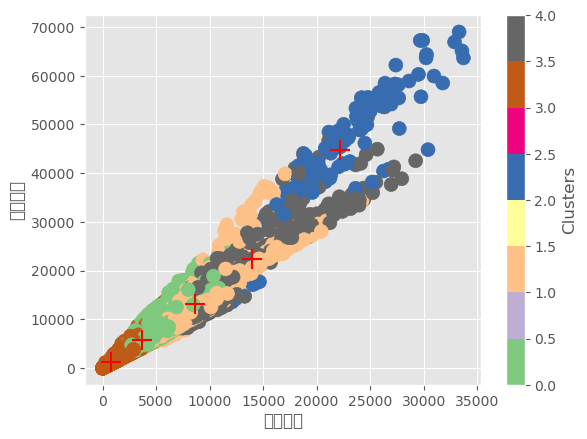

In [127]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# 플로팅 스타일 선택
matplotlib.style.use('ggplot')

# 주와 centroid를 플롯에 그린다.
ax = data.plot.scatter(columns[1], columns[2], c = 'Clusters',
                          cmap = plt.cm.Accent, s = 100)
centers.plot.scatter(columns[1], columns[2], color="red", marker="+", 
                     s=200, ax=ax)